Visualização inicial dos dados:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

/tmp/ipython-input-2372839318.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2372839318.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


🔹 Modelo: Random Forest
Acurácia: 85.45 %
Matriz de confusão:
 [[ 88  15]
 [ 17 100]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       103
           1       0.87      0.85      0.86       117

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:47:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 Modelo: XGBoost
Acurácia: 85.0 %
Matriz de confusão:
 [[89 14]
 [19 98]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.88      0.84      0.86       117

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220


🔹 Modelo: SVM
Acurácia: 82.73 %
Matriz de confusão:
 [[ 82  21]
 [ 17 100]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.83      0.85      0.84       117

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



🔹 Modelo: Rede Neural
Acurácia: 83.64 %
Matriz de confusão:
 [[ 84  19]
 [ 17 100]]
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       103
           1       0.84      0.85      0.85       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220


🎯 Resultados finais:
Regressão Logística: 80.91%
Naive Bayes: 78.64%
Árvore de Decisão: 83.64%
Random Forest: 85.45%
XGBoost: 85.0%
SVM: 82.73%
Rede Neural: 83.64%


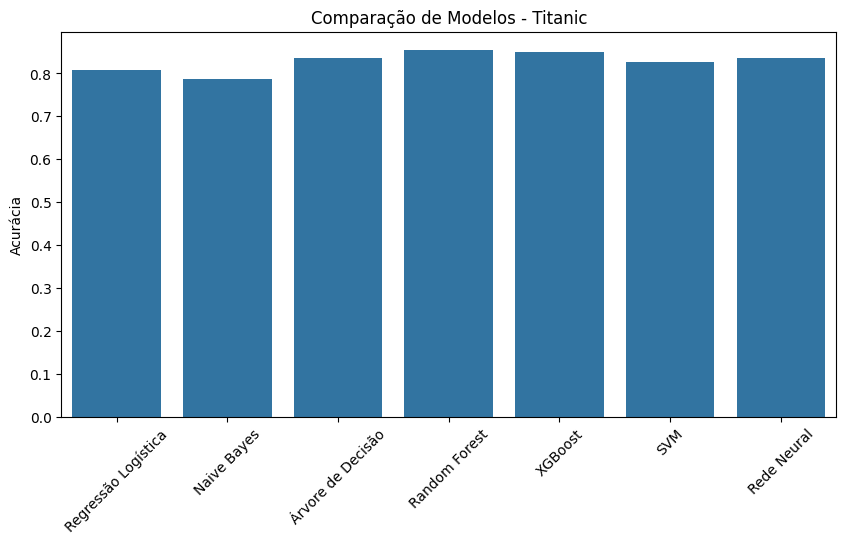

In [2]:
# ========================================
# 🧠 Projeto de Machine Learning - Titanic Dataset  - Desafio final dia 5
# ========================================

# 1. Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# ========================================
# 2. Carregar a base de dados
# ========================================
df = pd.read_csv("train.csv")  # Arquivo baixado do Kaggle
print("Visualização inicial dos dados:")
print(df.head())

# ========================================
# 3. Análise dos dados
# ========================================
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# ========================================
# 4. Tratamento dos dados
# ========================================

# Preencher valores faltantes em Age (idade) com a mediana
df["Age"].fillna(df["Age"].median(), inplace=True)

# Preencher valores faltantes em Embarked com o valor mais comum
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Preencher valores faltantes em Fare (se existirem) com a mediana
df["Fare"].fillna(df["Fare"].median(), inplace=True)

# Remover colunas irrelevantes ou difíceis de usar diretamente
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# ========================================
# 5. Definir variáveis independentes e alvo
# ========================================
X = df.drop("Survived", axis=1)
y = df["Survived"]

# ========================================
# 6. Pré-processamento
# ========================================

# Codificar variáveis categóricas (Sex, Embarked)
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Escalonamento
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Balanceamento da base (opcional, mas ajuda)
smt = SMOTE(sampling_strategy="minority", random_state=42)
X, y = smt.fit_resample(X, y)

# ========================================
# 7. Separar treino e teste
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========================================
# 8. Treinar diferentes modelos
# ========================================
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(),
    "Rede Neural": MLPClassifier(max_iter=500)
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc
    print(f"\n🔹 Modelo: {nome}")
    print("Acurácia:", round(acc*100, 2), "%")
    print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de classificação:\n", classification_report(y_test, y_pred))

# ========================================
# 9. Comparar resultados
# ========================================
print("\n🎯 Resultados finais:")
for nome, acc in resultados.items():
    print(f"{nome}: {round(acc*100,2)}%")

plt.figure(figsize=(10,5))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.xticks(rotation=45)
plt.title("Comparação de Modelos - Titanic")
plt.ylabel("Acurácia")
plt.show()
